<a href="https://colab.research.google.com/github/BrunoDkno368/Analisis-de-ventas-/blob/main/Analisis_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#ETL

##EXTRAT (E)

In [82]:
df = pd.read_csv('/content/drive/MyDrive/Ventas/20.11.25/sales_data_sample.csv', encoding='latin1')
df.sample(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
34,10194,42,100.00,11,7290.36,11/25/2003 0:00,Shipped,4,11,2003,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Large
323,10185,43,100.00,12,7886.20,11/14/2003 0:00,Shipped,4,11,2003,...,4575 Hillside Dr.,NaN,New Bedford,MA,50553,USA,NaN,Tam,Wing C,Large
144,10229,50,100.00,9,6426.50,3/11/2004 0:00,Shipped,1,3,2004,...,5677 Strong St.,NaN,San Rafael,CA,97562,USA,NaN,Nelson,Valarie,Medium
1437,10420,60,64.67,11,3880.20,5/29/2005 0:00,In Process,2,5,2005,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
2154,10194,37,97.27,3,3598.99,11/25/2003 0:00,Shipped,4,11,2003,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Medium


In [83]:
df.shape

(2823, 25)

## TRANSFORM (T)

### Cambiamos nombres de columnas

In [84]:
df = df.rename(columns={ 'ORDERNUMBER': 'ID orden',
    'QUANTITYORDERED': 'Cantidad',
    'PRICEEACH': 'Precio',
    'SALES': 'Ventas',
    'ORDERDATE': 'Fecha de orden',
    'PRODUCTLINE': 'Tipo de producto',
    'MSRP': 'Precio de venta sugerido'})

In [85]:
df = df[['ID orden', 'Cantidad', 'Precio', 'Ventas',  'Fecha de orden','Tipo de producto','Precio de venta sugerido']]

In [86]:
df.columns

Index(['ID orden', 'Cantidad', 'Precio', 'Ventas', 'Fecha de orden',
       'Tipo de producto', 'Precio de venta sugerido'],
      dtype='object')

###Convertir tipo de dato

In [87]:
print(df.dtypes)

ID orden                      int64
Cantidad                      int64
Precio                      float64
Ventas                      float64
Fecha de orden               object
Tipo de producto             object
Precio de venta sugerido      int64
dtype: object


la columna fecha de orden esta como objeto pasamos a fecha

In [88]:
df['Fecha de orden'] = pd.to_datetime(df['Fecha de orden'])

confirmamos que el tipo de columna ya quedo como fecha

In [89]:
print(df['Fecha de orden'].dtypes)

datetime64[ns]


### Nulos y duplicados

duplicados

In [90]:
df.duplicated().sum()

np.int64(0)

nulos

In [91]:
df.isna().sum()

,0
ID orden,0
Cantidad,0
Precio,0
Ventas,0
Fecha de orden,0
Tipo de producto,0
Precio de venta sugerido,0


  ### Creamos nuevas **columnas**

#### Año, Mes y Dia

In [92]:
df['Año'] = df['Fecha de orden'].dt.year
df['Mes'] = df['Fecha de orden'].dt.month
df['Dia'] = df['Fecha de orden'].dt.day

mes/nombre y dia/nombre (para practicar)

In [93]:
df['Mes/nombre'] = df['Fecha de orden'].dt.month_name()

In [94]:
df['Dia/nombre'] = df['Fecha de orden'].dt.day_name()

como esta en ingles lo pasamos a español

In [95]:
df[['Mes/nombre','Dia/nombre']].sample(5)

,Mes/nombre,Dia/nombre
523,January,Thursday
171,February,Sunday
1937,November,Thursday
146,June,Tuesday
967,November,Wednesday


In [96]:
mes_esp = {'January' : 'Enero',
           'February':'febrero',
           'March': 'Marzo',
           'April': 'abril',
           'May': 'Mayo',
           'June': 'Junio',
           'July': 'Julio',
           'August': 'Agosto',
           'September': 'Septiembre',
           'October': 'Octubre',
           'November': 'Noviembre',
           'December': 'Diciembre'}


In [97]:
df['Mes/nombre/esp'] = df['Mes/nombre'].map(mes_esp)

In [98]:
dia_esp = {'Monday': 'Lunes,',
           'Tuesday': 'Martes',
           'Wednesday': 'Miercoles',
           'Thursday': 'Jueves',
           'Friday': 'Viernes',
           'Saturday': 'Sabado',
           'Sunday': 'Domingo'}

In [99]:
df['Dia/nombre/esp'] = df['Dia/nombre'].map(dia_esp)

#### Margen por unidad

In [100]:
df.columns

Index(['ID orden', 'Cantidad', 'Precio', 'Ventas', 'Fecha de orden',
       'Tipo de producto', 'Precio de venta sugerido', 'Año', 'Mes', 'Dia',
       'Mes/nombre', 'Dia/nombre', 'Mes/nombre/esp', 'Dia/nombre/esp'],
      dtype='object')

In [101]:
df['Margen por unidad'] = (df['Precio de venta sugerido'] - df['Precio']).round(2)

#### Margen total

In [102]:
df['Margen total'] = (df['Margen por unidad'] * df['Cantidad']).round(2)

#### Margen total en %

In [103]:
df['Margen total %'] = ((df['Margen total'] / df['Ventas']) * 100).round(2)

#### Columna descuento

In [104]:
df['Descuento'] = (df['Precio de venta sugerido'] - df['Precio']).round(2)

#### Descuento en %

In [105]:
df['Descuento %'] = ((df['Descuento']/df['Precio de venta sugerido'])*100).round(0)

In [106]:
df.sample(6)

,ID orden,Cantidad,Precio,Ventas,Fecha de orden,Tipo de producto,Precio de venta sugerido,Año,Mes,Dia,Mes/nombre,Dia/nombre,Mes/nombre/esp,Dia/nombre/esp,Margen por unidad,Margen total,Margen total %,Descuento,Descuento %
808,10159,42,51.48,2162.16,2003-10-10,Motorcycles,60,2003,10,10,October,Friday,Octubre,Viernes,8.52,357.84,16.55,8.52,14.0
402,10203,47,100.00,5195.85,2003-12-02,Classic Cars,115,2003,12,2,December,Tuesday,Diciembre,Martes,15.00,705.00,13.57,15.00,13.0
2808,10232,24,49.69,1192.56,2004-03-20,Ships,54,2004,3,20,March,Saturday,Marzo,Sabado,4.31,103.44,8.67,4.31,8.0
1237,10386,22,57.55,1266.10,2005-03-01,Vintage Cars,105,2005,3,1,March,Tuesday,Marzo,Martes,47.45,1043.90,82.45,47.45,45.0
133,10103,42,100.00,5398.26,2003-01-29,Classic Cars,147,2003,1,29,January,Wednesday,Enero,Miercoles,47.00,1974.00,36.57,47.00,32.0
1871,10147,30,68.58,2057.40,2003-09-05,Classic Cars,61,2003,9,5,September,Friday,Septiembre,Viernes,-7.58,-227.40,-11.05,-7.58,-12.0


##LOAD (L)

In [107]:
df.to_csv('Ventas_limpio.csv',index=False )

# EDA

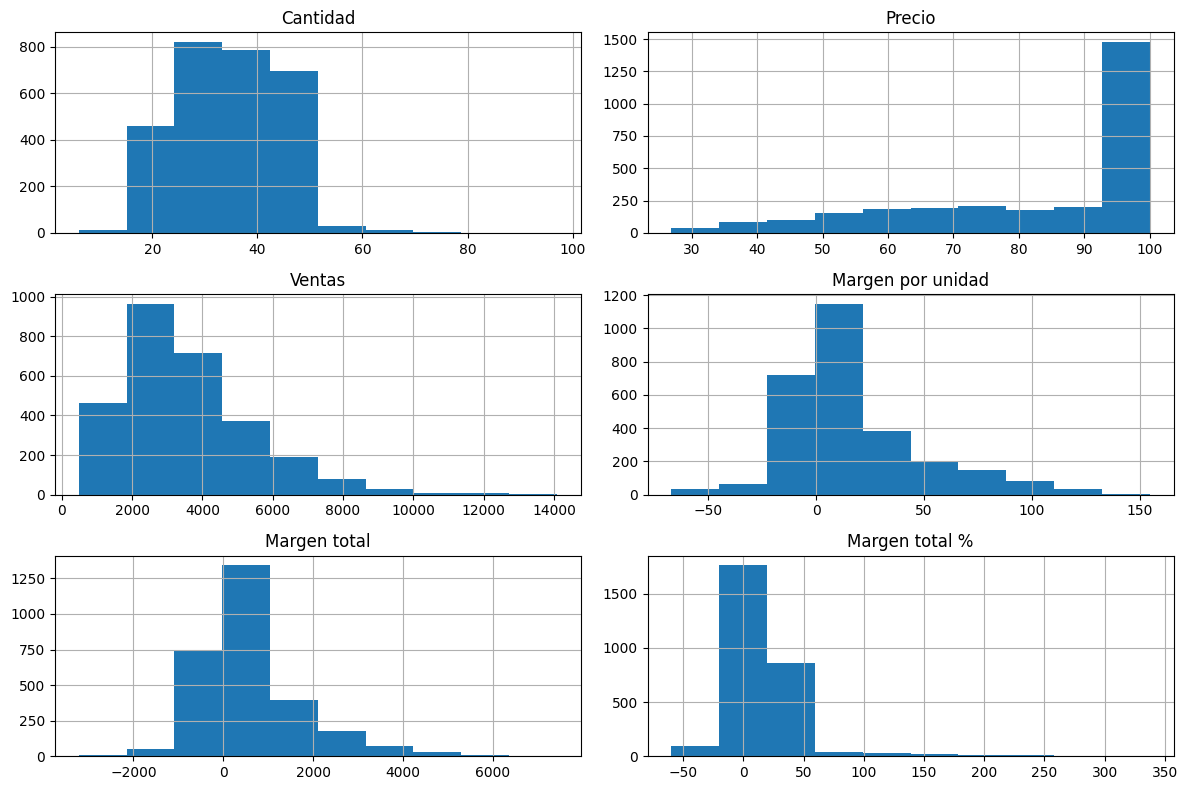

In [108]:
df[['Cantidad','Precio','Ventas','Margen por unidad','Margen total','Margen total %']].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

## Ventas por año

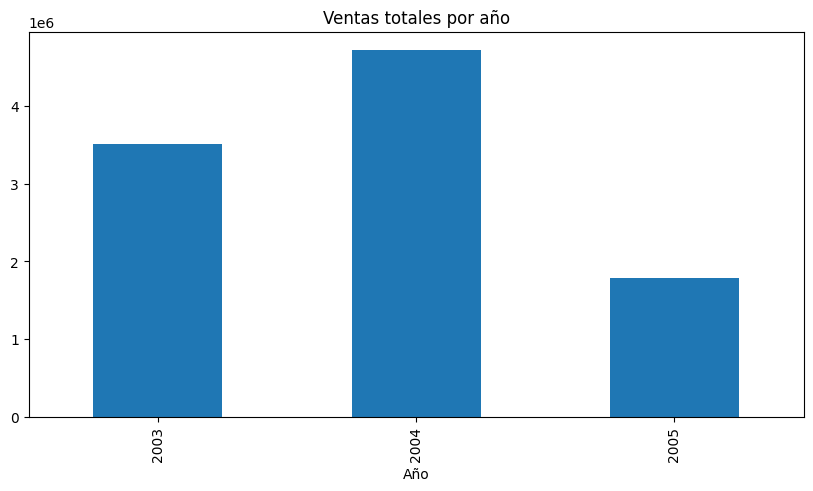

In [131]:
df.groupby('Año')['Ventas'].sum().plot(kind='bar', figsize=(10,5))
plt.title("Ventas totales por año")
plt.show()

##Ventas por tipo de producto

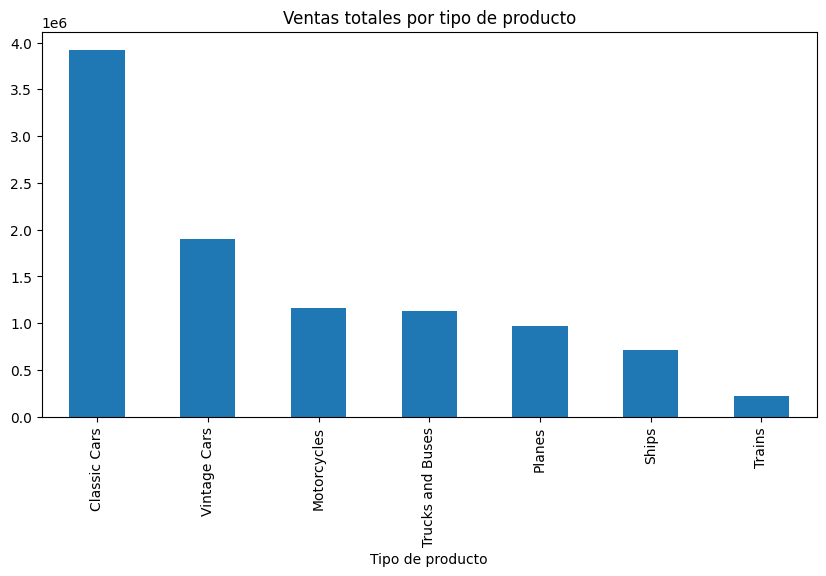

In [109]:
df.groupby('Tipo de producto')['Ventas'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.title("Ventas totales por tipo de producto")
plt.show()

## Descuento por tipo de producto

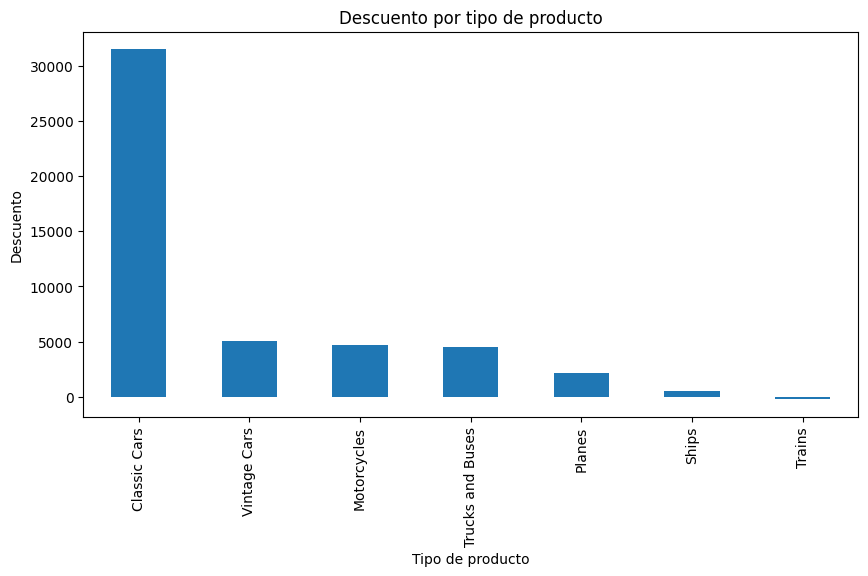

In [130]:
df.groupby('Tipo de producto')['Descuento'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.title("Descuento por tipo de producto")
plt.xlabel("Tipo de producto")
plt.ylabel("Descuento")
plt.show()

## Ventas por mes segun años

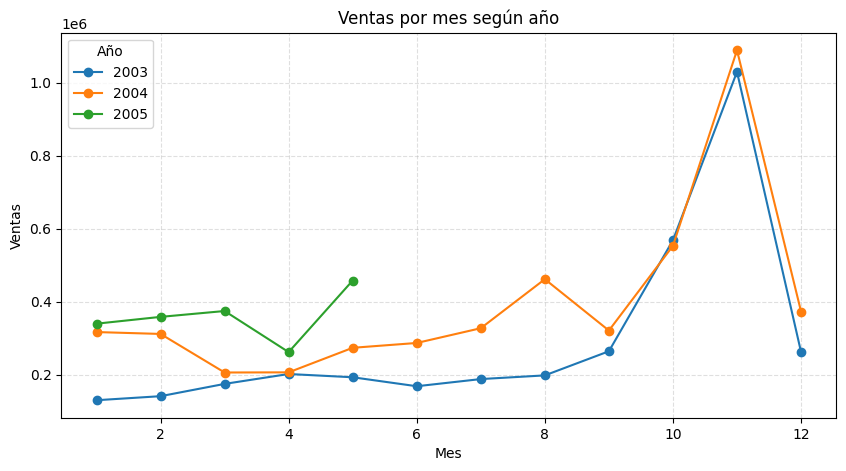

In [112]:
tabla= df.pivot_table(index='Mes', columns='Año',values='Ventas', aggfunc='sum')
plt.figure(figsize=(10,5))
for año in tabla.columns:
  plt.plot(tabla.index, tabla[año], marker="o", label=str(año))
plt.title("Ventas por mes según año")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.legend(title="Año")
plt.grid(True, linestyle="--", alpha=0.4)


plt.show()

## Ventas por dia de semana

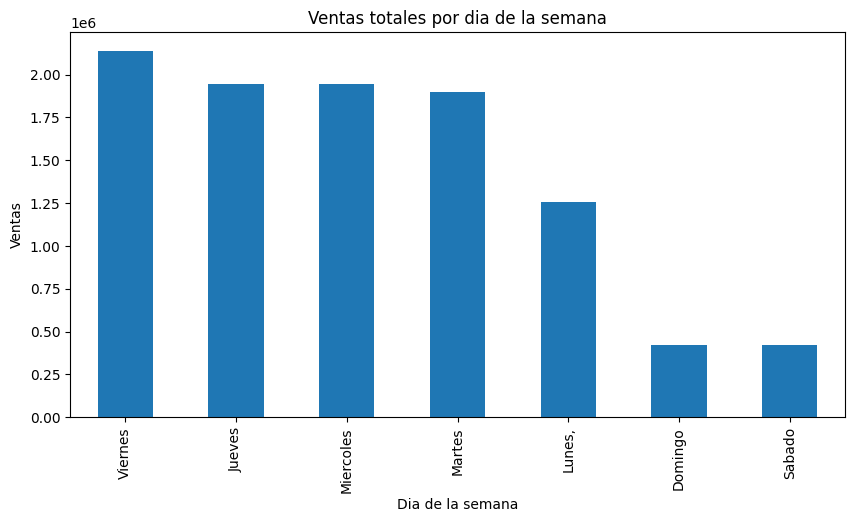

In [119]:
df.groupby('Dia/nombre/esp')['Ventas'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Ventas totales por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Ventas')
plt.show()

## Descuento por dia de semana

Text(0.5, 0, 'Dia')

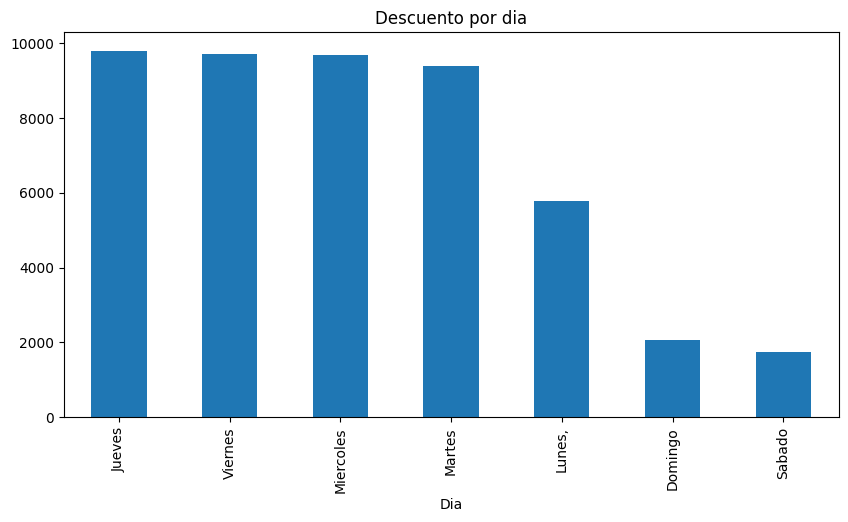

In [126]:
df.groupby('Dia/nombre/esp')['Descuento'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.title('Descuento por dia')
plt.xlabel('Dia')